<h1>Ver a anotação</h1>

In [41]:
#Importação das bibliotecas
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


#Carregando a imagem
img = cv2.imread("/home/george/deep/CNNs/Mask_RCNN/podocytes/images/0104.jpg")


"""
Lendo de um arquivo de texto
"""
a = pd.read_csv('/home/george/deep/CNNs/Mask_RCNN/podocytes/annots/0104.csv', header=None)
anotacao = a.values

print(anotacao.shape)

(8, 2)


tam 8


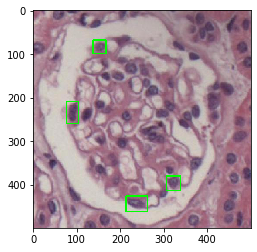

In [42]:
dados = np.array(anotacao)

#[[284.0, 45.0], [305.0, 64.0], [440.0, 156.0], [419.0, 127.0], [338.0, 267.0], [362.0, 297.0], [253.0, 268.0], [276.0, 295.0], [203.0, 299.0], [222.0, 266.0], [118.0, 228.0], [95.0, 255.0], [43.0, 220.0], [68.0, 241.0], [93.0, 289.0], [75.0, 311.0], [92.0, 321.0], [117.0, 339.0], [178.0, 393.0], [199.0, 417.0], [62.0, 100.0], [40.0, 128.0], [130.0, 83.0], [151.0, 109.0], [343.0, 390.0], [324.0, 409.0]]

#dados = np.array(dados)
px=[]
py=[]
#print dados.size
for x,y in dados:
    px=px+[int(x)]
    py=py+[int(y)]
    #print x, y
    
px = np.array(px)
py= np.array(py)
tam = px.size

print ("tam",tam)

i=0
while(i<tam-1):  
    cv2.rectangle(img, (px[i], py[i]), (px[i+1], py[i+1]), (0,255,0), 2)
    i=i+2
    
#Convertendo as cores
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#Exibindo
plt.imshow(img)

Código que vai pra rede...

In [44]:
import pandas as pd
import numpy as np

#função para extrair as anotações
def extrair_caixas(endereco_arquivo):
    #ler a anotação
    w = 500
    h = 500
    a = pd.read_csv(endereco_arquivo, header=None)
    anotacao = a.values #pega valores
    px=[]
    py=[]
    #coloca as coordenadas em listas
    dados = np.array(anotacao)
    for x,y in dados:
        px=px+[int(x)]
        py=py+[int(y)]
    
    #carrega tudo em uma matriz  
    px = np.array(px)
    py = np.array(py)
    tam = px.size
    caixas = []
    i=0
    while(i<tam-1):  
        coordenadas = [px[i], py[i], px[i+1], py[i+1]]
        caixas.append(coordenadas)
            
        i=i+2
        
    return caixas, w, h
    

caixas, l, a = extrair_caixas('/home/george/deep/CNNs/Mask_RCNN/podocytes/annots/0104.csv');
print(caixas, l, a)

[[137, 68, 167, 100], [104, 210, 76, 260], [213, 426, 262, 462], [305, 380, 338, 414]] 500 500
